# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

In [917]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

Oppgave 1

In [918]:
#Etterspørsel
def x_d(x):
    return ((500-x)/3.2)

#Tilbud
def x_s(x,t):
    return (x+100+4.3*t)/4.3

In [919]:
x,p,t=sp.symbols('x p t', real=True, positive=True)
likev=sp.Eq(x_d(x),x_s(x,t))
likev

Eq(156.25 - 0.3125*x, 1.0*t + 0.232558139534884*x + 23.2558139534884)

In [920]:
eq_d=sp.Eq(p,x_d(x))
eq_s=sp.Eq(p,x_s(x,t))

sol_dict=sp.solve ((eq_d, eq_s), (p,x))
sol_dict

{p: 0.573333333333333*t + 80.0, x: 244.0 - 1.83466666666667*t}

In [921]:
display(sol_dict[p]) #uttrykk for likevektspris

0.573333333333333*t + 80.0

In [922]:
p_eq=sp.lambdify(
    (t),
    sol_dict[p]
)
p_eq(t)

0.573333333333333*t + 80.0

In [923]:
display(sol_dict[x]) #uttrykk for likevektskvantum

244.0 - 1.83466666666667*t

In [924]:
x_eq=sp.lambdify(
    (t),
    sol_dict[x]
)
x_eq(t)

244.0 - 1.83466666666667*t

Oppgave 2

In [925]:
producer_surplus_f=sp.integrate(x_eq(t)-x_s(x,t),(x,0,p_eq(t)))
producer_surplus_f #uttrykk for produsentoverskudd

(220.744186046512 - 2.83466666666667*t)*(0.573333333333333*t + 80.0) - 744.186046511628*(0.00716666666666666*t + 1)**2

In [926]:
producer_surplus=sp.integrate(x_eq(0)-x_s(x,0),(x,0,p_eq(0)))
producer_surplus

16915.3488372093

In [927]:
producer_surplus1=sp.integrate(x_eq(4)-x_s(x,0),(x,0,p_eq(4)))
producer_surplus1

16774.3872727649

In [928]:
consumer_surplus_f=sp.simplify(sp.integrate(x_d(x)-x_eq(t),(x,0,p_eq(t))))
consumer_surplus_f #uttrykk for konsumentoverskuddet, KO

1.00051444444445*t**2 + 82.1300000000003*t - 8020.0

In [929]:
consumer_surplus=sp.integrate(x_d(x)-x_eq(0),(x,0,p_eq(0)))
consumer_surplus

-8020.00000000000

In [930]:
consumer_surplus1=sp.integrate(x_d(x)-x_eq(4),(x,0,p_eq(4)))
consumer_surplus1

-7675.47176888889

In [931]:
welfare_surplus_f=sp.simplify(sp.integrate(x_d(x)-x_s(x,t),(x,0,p_eq(t))))
welfare_surplus_f #uttrykk for samfunnsøkonomisk overskudd, SO, PO + KO

-0.662916666666666*t**2 - 28.75*t + 8895.3488372093

In [932]:
welfare_surplus=sp.integrate(x_d(x)-x_s(x,0),(x,0,p_eq(0)))
welfare_surplus

8895.34883720930

In [933]:
welfare_surplus1=sp.integrate(x_d(x)-x_s(x,4),(x,0,p_eq(4)))
welfare_surplus1

8769.74217054263

Oppgave 3

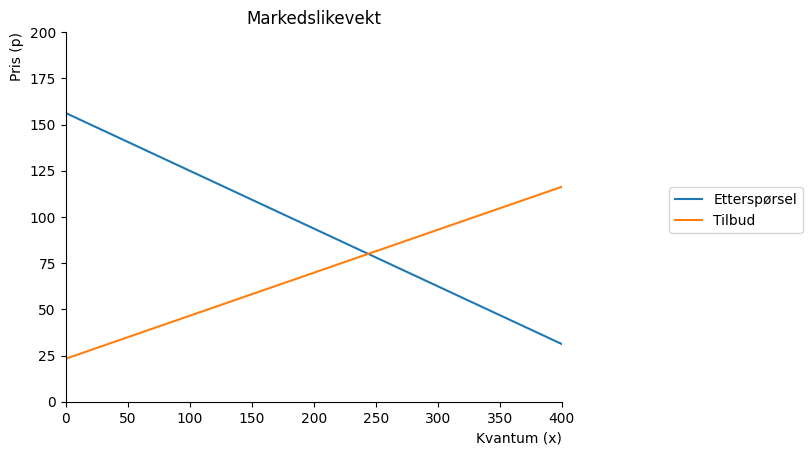

In [934]:
x_num=np.linspace(0.1,400,300)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,400))
                ax.set(ylim=(0,200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, x_d(x_num), label='Etterspørsel')
ax.plot(x_num, x_s(x_num,0), label='Tilbud')



# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

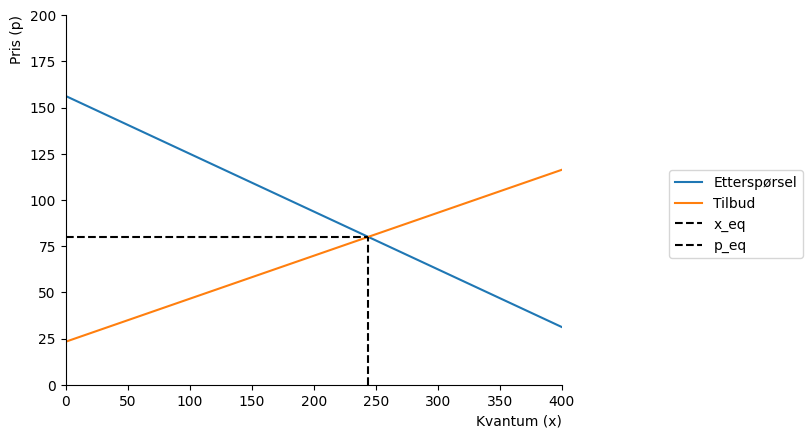

In [935]:
q = np.linspace(0,x_eq(0),300)

fig, ax = create_ax()
ax.plot(x_num, x_d(x_num), label='Etterspørsel')
ax.plot(x_num, x_s(x_num,0), label='Tilbud')

ax.vlines(x_eq(0),0,x_d(x_eq(0)), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq(0),0,x_eq(0), color='black',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6));

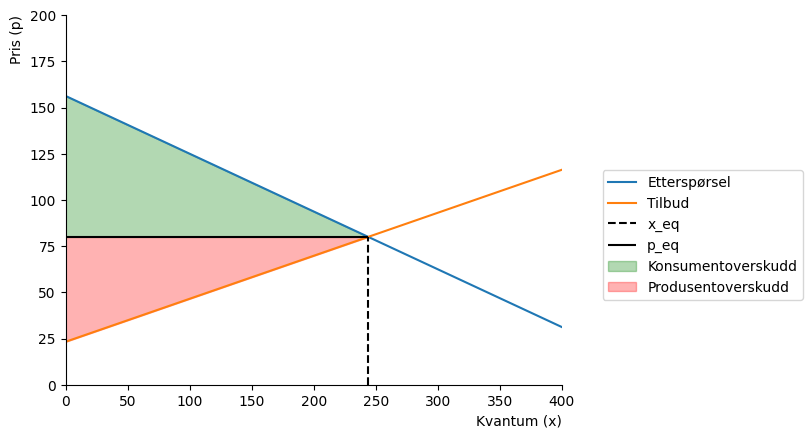

In [936]:
q=np.linspace(0,244,200)
fig, ax = create_ax()

ax.plot(x_num, x_d(x_num), label='Etterspørsel')
ax.plot(x_num, x_s(x_num,0), label='Tilbud')

ax.vlines(244,0,80, color='black',ls='dashed', label='x_eq')
ax.hlines(80,0,244, color='black', label='p_eq')

ax.fill_between(q,80,x_d(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,x_s(q,0),80, color = "red",alpha = 0.3,label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 4

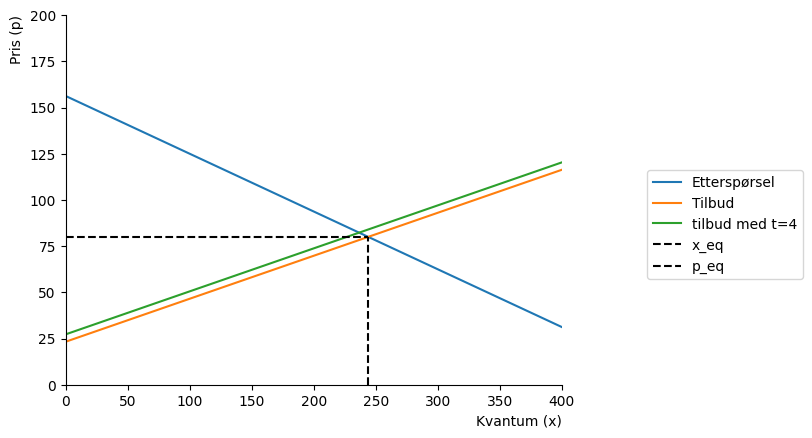

In [937]:
fig, ax = create_ax()

ax.plot(x_num, x_d(x_num), label='Etterspørsel')
ax.plot(x_num, x_s(x_num,0), label='Tilbud')
ax.plot(x_num,x_s(x_num,4),label='tilbud med t=4')

ax.vlines(x_eq(0),0,p_eq(0), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq(0),0,x_eq(0), color='black',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6));

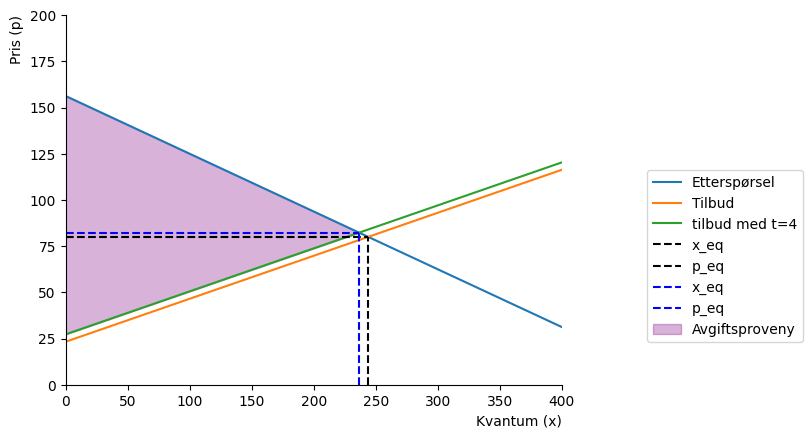

In [938]:
r=np.linspace(0,x_eq(4),300)
fig, ax = create_ax()

ax.plot(x_num, x_d(x_num), label='Etterspørsel')
ax.plot(x_num, x_s(x_num,0), label='Tilbud')
ax.plot(x_num,x_s(x_num,4),label='tilbud med t=4')

ax.vlines(x_eq(0),0,p_eq(0), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq(0),0,x_eq(0), color='black',ls='dashed', label='p_eq')
ax.vlines(x_eq(4),0,p_eq(4), color='blue',ls='dashed', label='x_eq')
ax.hlines(p_eq(4),0,x_eq(4), color='blue',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6))
ax.fill_between(r,x_d(r),x_s(r,4), color = "purple",alpha = 0.3,label='Avgiftsproveny')
ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 5

In [940]:
from IPython.display import Markdown

tbl=f"""
|                     | før avgift               | ettter avgift               | Endring(ettter avgift - før avgift)      |
| :-------------------| :------------------------| :---------------------------| :----------------------------------------|
| Produsentpris:      | ${0}$                    | ${(4)}$                     | ${((4))}$  |
| Konsumentpris:      | ${p_eq(0)}$              | ${(p_eq(4))}$               | ${((p_eq(4)-p_eq(0)))}$  |
| Kvantum:            | ${x_eq(0)}$              | ${x_eq(4)}$                 | ${(x_eq(4)-x_eq(0))}$    |
| Konsumentoverskudd: | ${consumer_surplus}$    | ${consumer_surplus1}$        | ${(consumer_surplus1-consumer_surplus)}$ |
| Produsentoverskudd: | ${producer_surplus}$    | ${producer_surplus1}$        | ${(producer_surplus1-producer_surplus)}$ |
| KO + PO:            | ${welfare_surplus}$     | ${welfare_surplus1}$         | ${((welfare_surplus1-welfare_surplus))}$ |
| skatteproveny:      | ${0}$|${((welfare_surplus-welfare_surplus1))}$| ${(welfare_surplus1-welfare_surplus-0)}$ |
| Dødvektstap :       | ${0}$| ${((17*(x_eq(4)-x_eq(0)))/2)}$        | ${((17*(x_eq(4)-x_eq(0)))/2-0)}$   |
"""
display(Markdown(tbl))


|                     | før avgift               | ettter avgift               | Endring(ettter avgift - før avgift)      |
| :-------------------| :------------------------| :---------------------------| :----------------------------------------|
| Produsentpris:      | $0$                    | $4$                     | $4$  |
| Konsumentpris:      | $80.0$              | $82.29333333333334$               | $2.2933333333333366$  |
| Kvantum:            | $244.0$              | $236.66133333333332$                 | $-7.338666666666683$    |
| Konsumentoverskudd: | $-8020.00000000000$    | $-7675.47176888889$        | $344.528231111112$ |
| Produsentoverskudd: | $16915.3488372093$    | $16774.3872727649$        | $-140.961564444446$ |
| KO + PO:            | $8895.34883720930$     | $8769.74217054263$         | $-125.606666666668$ |
| skatteproveny:      | $0$|$125.606666666668$| $-125.606666666668$ |
| Dødvektstap :       | $0$| $-62.3786666666668$        | $-62.3786666666668$   |
